<a href="https://colab.research.google.com/github/saja13-zh/ANN/blob/main/ann_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import utils as np_utils

(400, 64, 64)
(400,)
40
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 16)        3216      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_20 (MaxPooli  (

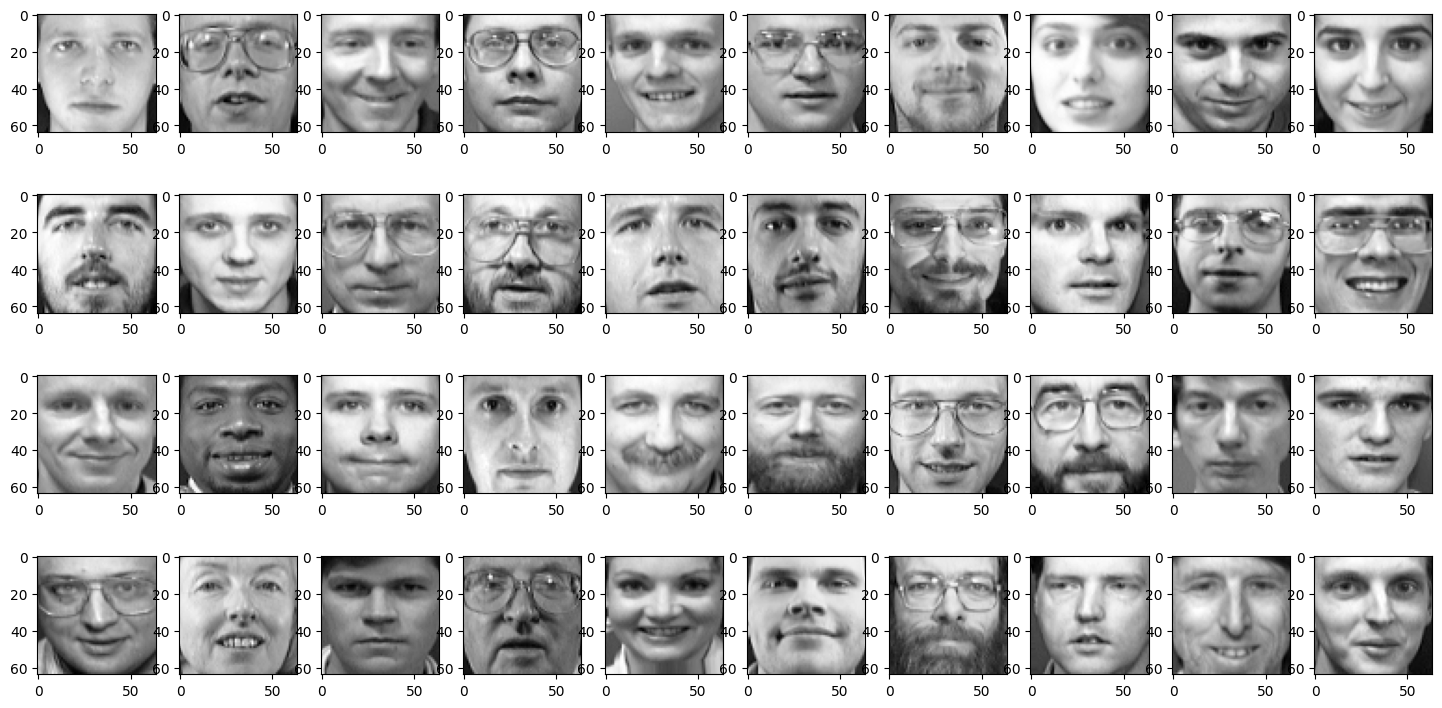

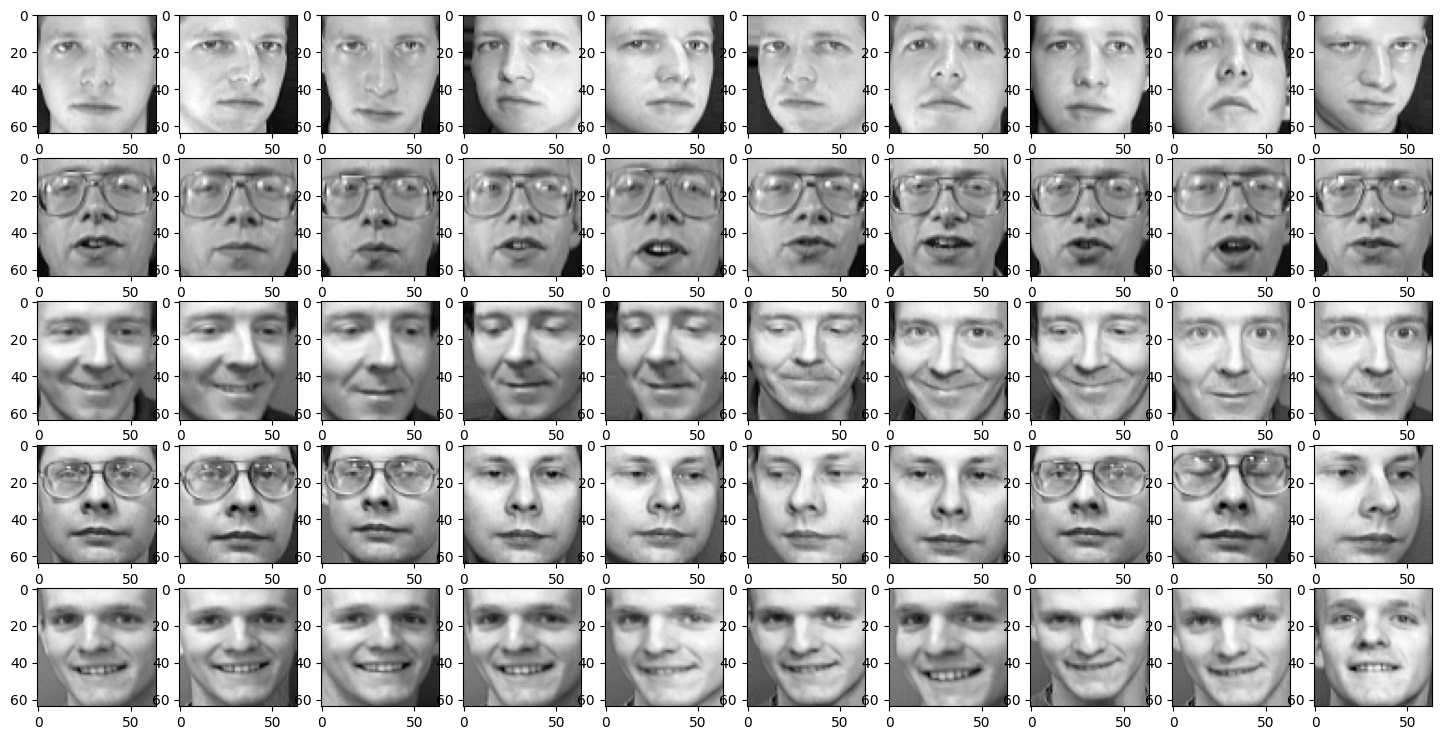

In [ ]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt

#Load data, face images and their target i.e. perosn number
data = np.load("/content/olivetti_faces (1).npy")
target = np.load("/content/olivetti_faces_target (1).npy")

#print the size of data and target
#Data has 400 images of size 64 x 64 pixels (grayscale)
#Target has information about class of all 400 images
print(data.shape)
print(target.shape)

#Identity number of unique persons (ids) in the trarget data
#For ORL / Olivetti face dataset this there are 40 people
#The dataset contains 10 images of each person. Therefore 40 x 10 = 400 images
unique_ids=np.unique(target)
print(len(unique_ids))

#Display one sample image for each person
#Display the 40 images in 4 rows with each row having 10 images
fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr = axarr.flatten()
imgs=data
for id in unique_ids:
    img_id = id * 10
    axarr[id].imshow(imgs[img_id], cmap='gray')

#Display all 10 images of first 5 people
cols = 10
subject_ids=[0, 1, 2, 3, 4]
rows = (len(subject_ids)*10)//cols
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
for i, subject_ids in enumerate(subject_ids):
    for j in range(cols):
        img_id = subject_ids*10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')

#Split the data into test and train data. Select test size = 20%
#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#Import keras for building the Convolutional Neural Network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

#Split the data into test and train data. Select test size = 20%
from sklearn.model_selection import train_test_split
target = np.load("/content/olivetti_faces_target (1).npy")
target = np_utils.to_categorical(target, len(np.unique(target)))

#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#target.shape

#Remember the third dimension is important for keras so specify that third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)


#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 32 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print a summary of the model
model.summary()

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Question 1: What is the output of the model.summary()?

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 16)        3216      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 2, 2, 32)         

Question 2: What the initial training accuracy and validation accuracy of the CNN?

Question 3: How many convolutional layers and pooling layers does this network have?

3 convolutional layers
3 pooling layers

In [ ]:
train_accuracy = H.history['accuracy'][0]
val_accuracy = H.history['val_accuracy'][0]

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.02734375
Validation Accuracy: 0.03125


Question 4: Generally, the larger the size of the image the more the information in it. The maxpooling layers after first and second Convolutional layer decrease the size of the image by 4. Check
if this is causing the network to have such a poor validation accuracy? If the size of pooling layers
size is changed from (4,4) to (2,2) what is the effect on accuracy of the network?

In [ ]:

#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print a summary of the model
model.summary()

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 32, 32, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        3216      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 8, 8, 32)         

{'loss': [3.8354296684265137, 3.684023141860962, 3.654233932495117, 3.615586757659912, 3.567579507827759, 3.443157196044922, 3.159914493560791, 2.6891777515411377, 2.0982139110565186, 1.5796196460723877], 'accuracy': [0.0234375, 0.0546875, 0.078125, 0.08203125, 0.109375, 0.18359375, 0.44921875, 0.46484375, 0.67578125, 0.75390625], 'val_loss': [3.820240020751953, 3.7983288764953613, 3.7697489261627197, 3.746443271636963, 3.6619763374328613, 3.4680991172790527, 3.0647475719451904, 2.598247528076172, 2.147672653198242, 1.6268705129623413], 'val_accuracy': [0.0, 0.015625, 0.03125, 0.046875, 0.09375, 0.3125, 0.359375, 0.46875, 0.515625, 0.71875]}


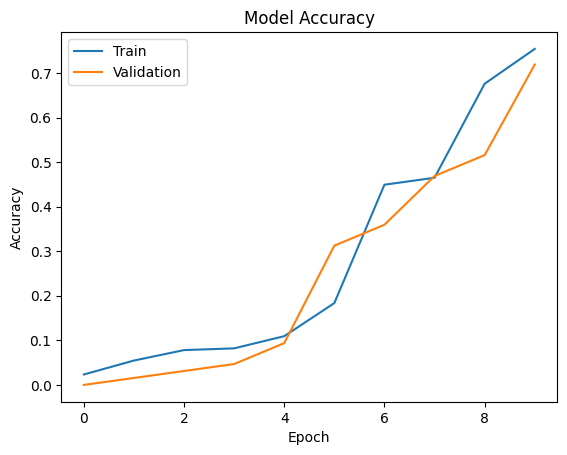

In [ ]:
print(H.history)

# Plot the training and validation accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Q5: Dr. Hinton, has highlighted that aggressively using pooling layers may result in loss of
important information. Is there a way that the CNN architecture starts producing better training
and validation accuracy?

capsules

Q6:Make changes to the convolutional neural network to get the best validation accuracy.
You are not allowed to change the number of epochs or batch size for this task.


In [ ]:

#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 32 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 64 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print a summary of the model
model.summary()

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 8, 8, 64)         

In [ ]:
print(H.history)

# Plot the training and validation accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Question 8: For the best network architecture change the batch size to 16 and plot the training vs
validation accuracy graph. What happened to the validation accuracy after last epoch as compared
to when the batch size was 32.

In [ ]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)

Epoch 1/10
16/16 [==============================] - 3s 123ms/step - loss: 0.7274 - accuracy: 0.9453 - val_loss: 0.8332 - val_accuracy: 0.9219
Epoch 2/10
16/16 [==============================] - 2s 115ms/step - loss: 0.4322 - accuracy: 0.9844 - val_loss: 0.6282 - val_accuracy: 0.9219
Epoch 3/10
16/16 [==============================] - 2s 105ms/step - loss: 0.2323 - accuracy: 1.0000 - val_loss: 0.3691 - val_accuracy: 0.9531
Epoch 4/10
16/16 [==============================] - 2s 131ms/step - loss: 0.1471 - accuracy: 1.0000 - val_loss: 0.3487 - val_accuracy: 0.9688
Epoch 5/10
16/16 [==============================] - 3s 175ms/step - loss: 0.0953 - accuracy: 1.0000 - val_loss: 0.2930 - val_accuracy: 0.9531
Epoch 6/10
16/16 [==============================] - 2s 119ms/step - loss: 0.0654 - accuracy: 1.0000 - val_loss: 0.2228 - val_accuracy: 0.9688
Epoch 7/10
16/16 [==============================] - 2s 103ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 0.2110 - val_accuracy: 0.9688
Epoch 

{'loss': [0.7273826003074646, 0.4322316646575928, 0.2322685420513153, 0.14708255231380463, 0.09528796374797821, 0.06538750231266022, 0.04705268517136574, 0.03698835149407387, 0.03081568516790867, 0.027446918189525604], 'accuracy': [0.9453125, 0.984375, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.833158016204834, 0.6281611919403076, 0.3691427707672119, 0.3486677408218384, 0.29303884506225586, 0.22278079390525818, 0.21095824241638184, 0.1894415318965912, 0.18544253706932068, 0.17658676207065582], 'val_accuracy': [0.921875, 0.921875, 0.953125, 0.96875, 0.953125, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875]}


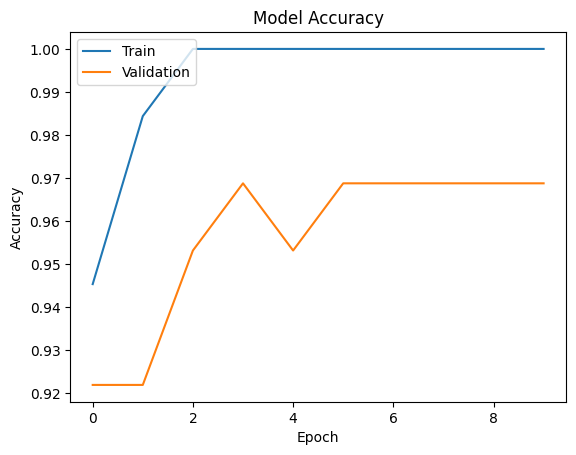

In [ ]:
print(H.history)

# Plot the training and validation accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Question 9: For the best network architecture change the number of epochs to 5 and 20 and share
the final validation accuracy for 5, 10 and 20 epochs. What do the results highlight?


In [ ]:
# For 5 epochs
H_5 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=5, verbose=1)
#for 10 epochs
H_10 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)
# For 20 epochs
H_20 = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=20, verbose=1)

# Print final validation accuracies
print("Validation Accuracy (5 epochs):", H_5.history['val_accuracy'][-1])
print("Validation Accuracy (10 epochs):", H_10.history['val_accuracy'][-1])
print("Validation Accuracy (20 epochs):", H_20.history['val_accuracy'][-1])

Epoch 1/5
16/16 [==============================] - 2s 124ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.1674 - val_accuracy: 0.9688
Epoch 2/5
16/16 [==============================] - 3s 190ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.1579 - val_accuracy: 0.9688
Epoch 3/5
16/16 [==============================] - 2s 140ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.1579 - val_accuracy: 0.9688
Epoch 4/5
16/16 [==============================] - 2s 106ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.1463 - val_accuracy: 0.9688
Epoch 5/5
16/16 [==============================] - 2s 112ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1410 - val_accuracy: 0.9688
Epoch 1/10
16/16 [==============================] - 2s 101ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.1413 - val_accuracy: 0.9688
Epoch 2/10
16/16 [==============================] - 2s 100ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.1372 - val_accuracy: 0.9688
Epoch 3/10


Question 10: For the best network architecture and batch size =16 and epochs =10, change the test
data size to 40% and share what is the effect on validation accuracy of the algorithm?

(400, 64, 64)
(400,)
40
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (

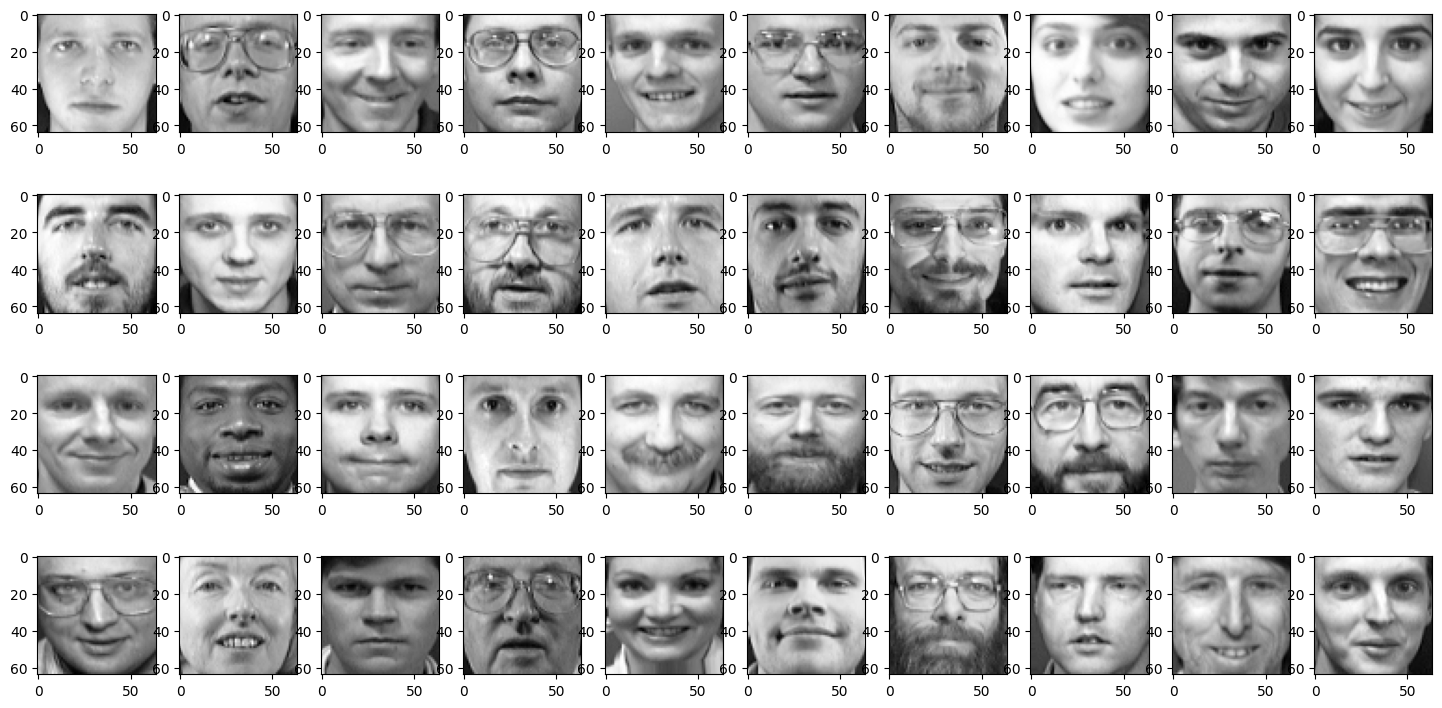

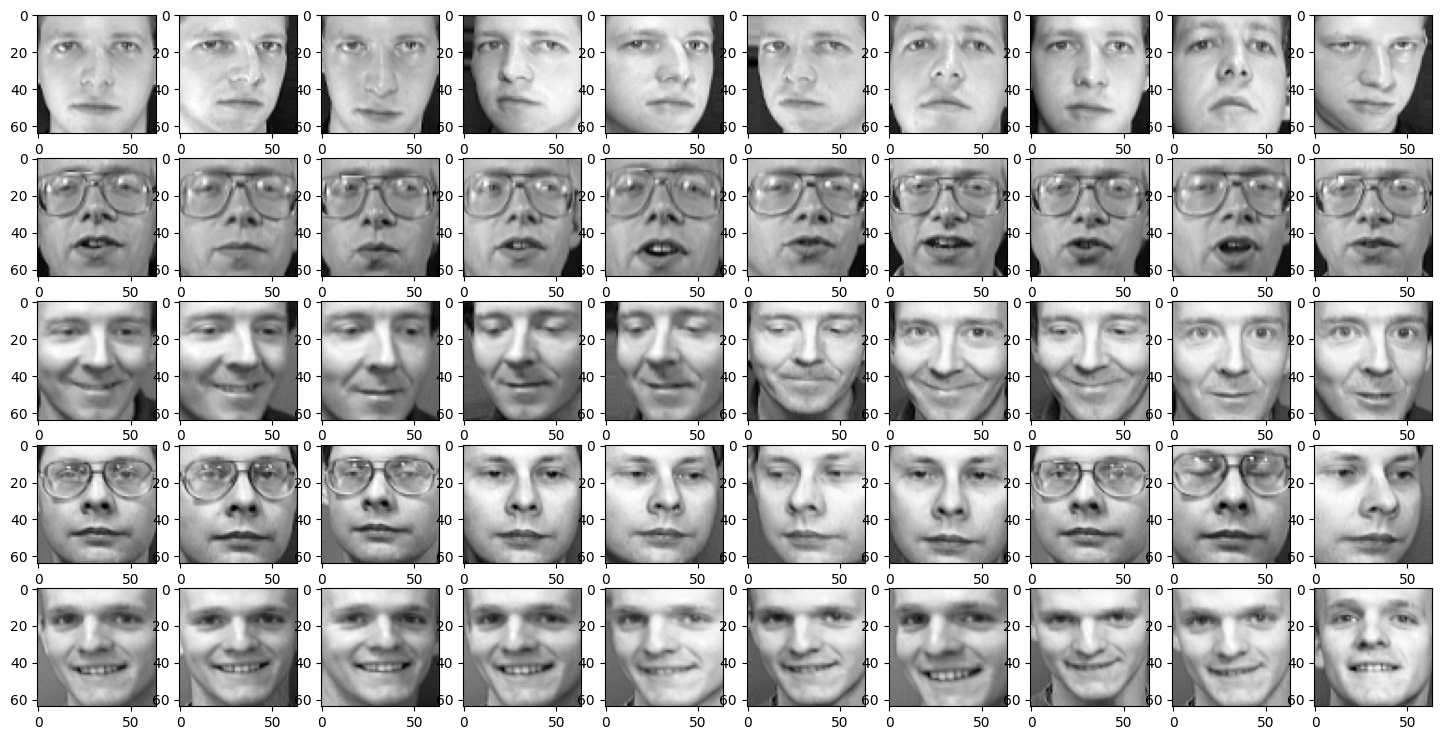

In [ ]:
# Standard scientific Python imports
import numpy as np
import matplotlib.pyplot as plt

#Load data, face images and their target i.e. perosn number
data = np.load("/content/olivetti_faces (1).npy")
target = np.load("/content/olivetti_faces_target (1).npy")

#print the size of data and target
#Data has 400 images of size 64 x 64 pixels (grayscale)
#Target has information about class of all 400 images
print(data.shape)
print(target.shape)

#Identity number of unique persons (ids) in the trarget data
#For ORL / Olivetti face dataset this there are 40 people
#The dataset contains 10 images of each person. Therefore 40 x 10 = 400 images
unique_ids=np.unique(target)
print(len(unique_ids))

#Display one sample image for each person
#Display the 40 images in 4 rows with each row having 10 images
fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr = axarr.flatten()
imgs=data
for id in unique_ids:
    img_id = id * 10
    axarr[id].imshow(imgs[img_id], cmap='gray')

#Display all 10 images of first 5 people
cols = 10
subject_ids=[0, 1, 2, 3, 4]
rows = (len(subject_ids)*10)//cols
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
for i, subject_ids in enumerate(subject_ids):
    for j in range(cols):
        img_id = subject_ids*10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')

#Split the data into test and train data. Select test size = 20%
#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

#Import keras for building the Convolutional Neural Network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

#Split the data into test and train data. Select test size = 20%
from sklearn.model_selection import train_test_split
target = np.load("/content/olivetti_faces_target (1).npy")
target = np_utils.to_categorical(target, len(np.unique(target)))

#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.4, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.4, random_state = 0)

#target.shape

#Remember the third dimension is important for keras so specify that third dimension is 1
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)


#Define the architecture of the convolutional neural network
model = Sequential()

#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 31 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a conv layer having 64 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Print a summary of the model
model.summary()

#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10, verbose=1)

{'loss': [3.9262895584106445, 3.670280933380127, 3.6128010749816895, 3.575500965118408, 3.5070462226867676, 3.3593664169311523, 3.0320851802825928, 2.4167253971099854, 1.6486763954162598, 1.138590931892395], 'accuracy': [0.0069444444961845875, 0.02777777798473835, 0.02083333395421505, 0.0694444477558136, 0.0763888880610466, 0.1666666716337204, 0.3333333432674408, 0.5208333134651184, 0.6805555820465088, 0.8472222089767456], 'val_loss': [3.9044809341430664, 3.9855470657348633, 3.976936101913452, 3.977264404296875, 3.914155960083008, 3.750469446182251, 3.4657232761383057, 3.0535335540771484, 2.586768865585327, 2.2043750286102295], 'val_accuracy': [0.0, 0.03125, 0.0520833320915699, 0.0625, 0.0416666679084301, 0.2395833283662796, 0.375, 0.34375, 0.53125, 0.6041666865348816]}


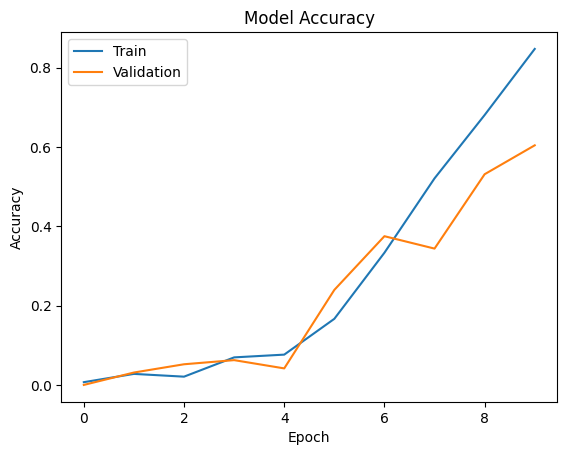

In [ ]:
print(H.history)

# Plot the training and validation accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()